In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('all')


In [ ]:
# extraction and description of data
path = '/content/drive/MyDrive/Major Project/IMDB Dataset.csv'
df = pd.read_csv(path)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

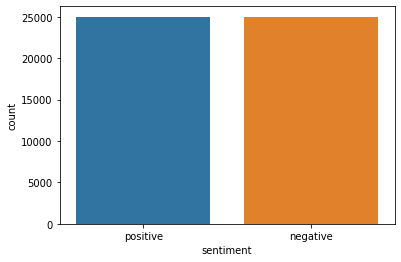

In [ ]:
sns.countplot(x = df['sentiment'])

In [ ]:
df.drop(df.tail(10000).index,
        inplace = True)

In [ ]:
df.sentiment.value_counts()

negative    20007
positive    19993
Name: sentiment, dtype: int64

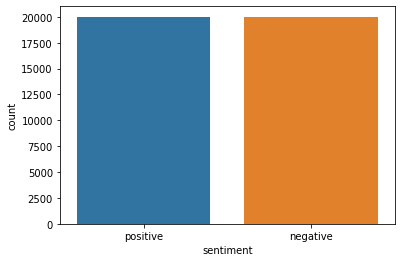

In [ ]:
sns.countplot(x = df['sentiment'])

In [ ]:
#DATA preprocessing
import re
stop_words = stopwords.words('english')
len(stop_words)
negative_words=['no','not',"don't","aren't","couldn't","didn't","doesn't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","shouldn't","wasn't","weren't","won't","wouldn't"]
for negative_word in negative_words:
  stop_words.remove(negative_word)

In [ ]:
ps = PorterStemmer()
filter_review = []
for sentence in df['review']:
  filter_sentence = []
  sentence = sentence.replace('<br /><br />',' ')
  sentence = re.sub('[^a-zA-Z]',' ',sentence)
  sentence = sentence.lower()
  for word in nltk.word_tokenize(sentence):
    if word not in stopwords.words('english'):
      filter_sentence.append(ps.stem(word))
  filter_sentence = ' '.join(word for word in filter_sentence)
  filter_review.append(filter_sentence)
    #applying stemming

In [ ]:
#Lets view the transformed text
x = np.array(filter_review)
y = df['sentiment'].values
y = np.array(y)

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer 

In [ ]:
y = df['sentiment'].values
y = np.array(y)

In [ ]:
#spliting test and train data
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
from sklearn.pipeline import Pipeline
text_model = Pipeline([('vect',TfidfVectorizer()),('model',SVC())])

In [ ]:
text_model.fit(x_train,y_train)

Pipeline(steps=[('vect', TfidfVectorizer()), ('model', SVC())])

In [ ]:
y_pred = text_model.predict(x_test)
y_pred[:10]

array(['positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'negative', 'positive'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
print(accuracy_score(y_pred,y_test),'\n',confusion_matrix(y_pred,y_test),'\n',classification_report(y_pred,y_test))


0.8925 
 [[4468  444]
 [ 631 4457]] 
               precision    recall  f1-score   support

    negative       0.88      0.91      0.89      4912
    positive       0.91      0.88      0.89      5088

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
import joblib
joblib.__version__

'1.2.0'

In [ ]:

joblib.dump(text_model,'imdb-rating')

['imdb-rating']

In [ ]:
!pip install pyngrok==4.1.1 --quiet
!pip install streamlit==0.80.0 --quiet

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.9 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import base64
st.set_page_config(layout='wide')
st.markdown("""
    <style>
    .big-font {
        font-size:50px !important;
        font-family:Felix Titling Regular;
    }
    </style> 
""", unsafe_allow_html=True)

st.markdown("""
    <style>
    .small-font {
        font-size: 18px !important;
        font-family:Felix Titling Regular;
    }
    </style>
""", unsafe_allow_html=True)

st.markdown("""
    <style>
    .medium-font {
        font-size:20px !important;
        font-family:Felix Titling Regular;
    }
    </style>
""", unsafe_allow_html=True)

st.markdown('<p class="big-font">IMDB Review Sentiment Analysis !!</p>', unsafe_allow_html=True)
st.markdown('<p class="medium-font">Enter Review !!</p>', unsafe_allow_html=True)
review = st.text_input("Here")
model = joblib.load('imdb-rating')
op = model.predict([review])
if st.button('Analyse'):
  st.markdown(f'<p class="medium-font"> The Review is {op[0]} </p>',unsafe_allow_html=True)

Writing app.py


In [ ]:
from pyngrok import ngrok
!ngrok authtoken 1tc7WfkcPeRXoCKsTj5ux3R9Lxz_5j1GmqJH6rsajL6oBYC2Q
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
nohup: appending output to 'nohup.out'


'http://0f1c-35-234-52-83.ngrok.io'